In [102]:
using DelimitedFiles, Plots
gr( fmt = :png)

Plots.GRBackend()

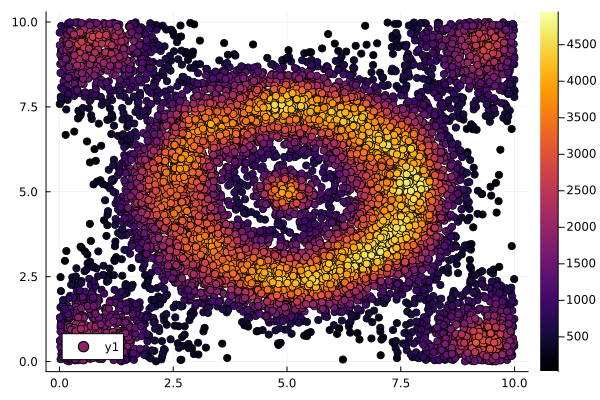

In [108]:
toy = readdlm("inputs/toy_example_w_density.txt")

scatter(toy[:,1], toy[:,2], marker_z = toy[:,3])

In [109]:
run(`./main inputs/toy_example_w_density.txt 0.25 1e20`)

Dimension: 2
Number of input points: 10000
Number of clusters: 0


Process(`./main inputs/toy_example_w_density.txt 0.25 1e20`, ProcessExited(0))

- `0.25` is the value of radius delta (a.k.a. Rips radius) to be used
  in the construction of the neighborhood (Rips) graph.

- `1e20` is the values of the threshold tau on the prominence of the
  clusters to be used for merging clusters. It also serves as a
  threshold on the heights of the peaks, so any cluster of height less
  than tau is treated as background noise.



In [110]:
pairs = readdlm("diagram.txt")
hmin = minimum(filter(isfinite, pairs[:,2]))

125.0

(xmin, xmax) = extrema(pairs[:, 1]) = (25.0, 4950.0)


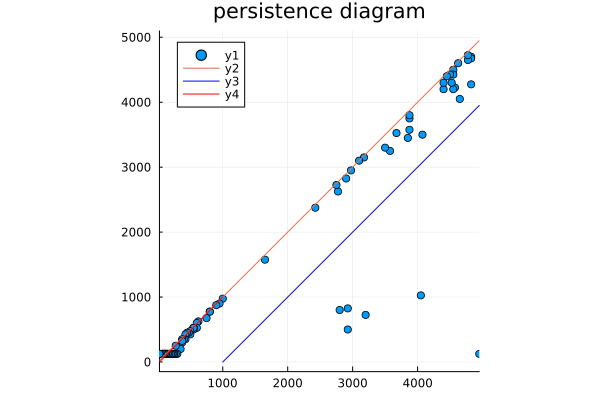

In [111]:
for (i,p) in enumerate(eachrow(pairs))
    if isinf(p[2])
        pairs[i,2] = hmin
    end
end

scatter(pairs[:,1], pairs[:,2]) 
plot!(x -> x, title="persistence diagram", aspect_ratio = 1)

@show xmin, xmax = extrema(pairs[:,1])

τ = 1e3
plot!([τ,xmax],[0, xmax-τ], color="blue")
plot!([τ, xmin],[τ,0], color="red")
xlims!((xmin, xmax))

In [112]:
run(`./main inputs/toy_example_w_density.txt 0.25 1e3`)


Dimension: 2
Number of input points: 10000
Number of clusters: 6


Process(`./main inputs/toy_example_w_density.txt 0.25 1e3`, ProcessExited(0))

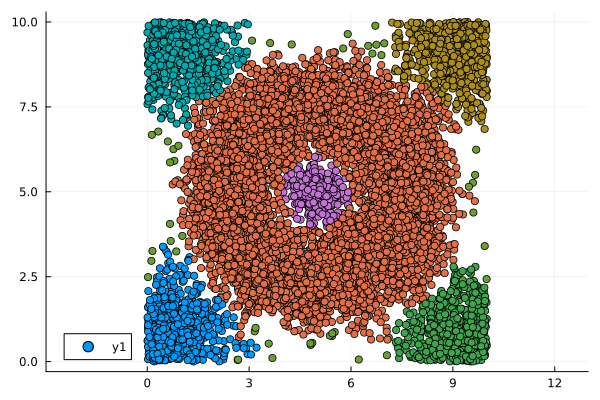

In [113]:
clusters = vec(readdlm("clusters.txt"))
clusters[isnan.(clusters)] .= 0
scatter(toy[:,1], toy[:,2], color = Int.(clusters), aspect_ratio=1)